# Travelling Salesperson Problem solved using genetic algorithms

In [ ]:
# Imports
import numpy as np
import random

from datetime import datetime

In [ ]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [ ]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [19, 77],
 'London': [95, 32],
 'Moscow': [78, 36],
 'Barcelona': [36, 12],
 'Rome': [54, 18],
 'Paris': [97, 55],
 'Vienna': [48, 81],
 'Munich': [57, 20],
 'Istanbul': [46, 27],
 'Kyiv': [60, 11],
 'Bucharest': [95, 19],
 'Minsk': [73, 89],
 'Warsaw': [1, 84],
 'Budapest': [56, 92],
 'Milan': [65, 4],
 'Prague': [23, 69],
 'Sofia': [57, 61],
 'Birmingham': [81, 61],
 'Brussels': [44, 65],
 'Amsterdam': [60, 20]}

## 1. Create the first population set
We randomly shuffle the cities N times where N=population_size

In [ ]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Munich', 'Budapest', 'Barcelona', ..., 'Vienna', 'London',
        'Rome'],
       ['Budapest', 'London', 'Paris', ..., 'Birmingham', 'Milan',
        'Berlin'],
       ['Berlin', 'Kyiv', 'London', ..., 'Barcelona', 'Munich', 'Warsaw'],
       ...,
       ['Moscow', 'Prague', 'Brussels', ..., 'Bucharest', 'Munich',
        'Paris'],
       ['Milan', 'Moscow', 'Barcelona', ..., 'Brussels', 'Sofia',
        'Amsterdam'],
       ['Istanbul', 'Birmingham', 'Prague', ..., 'Munich', 'Sofia',
        'Brussels']], dtype='<U10')

## 2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first.
The fitness function needs to compute the distance between subsequent cities.

In [ ]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [ ]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 914.85365434, 1084.33700829,  979.8986981 ,  928.01067068,
        948.44006524, 1051.36379386,  992.20937901,  977.85451167,
        997.08856138,  895.89163681, 1096.9811099 , 1012.08537967,
        740.939105  , 1012.38690561,  832.18334756,  940.45587061,
        819.94977653, 1027.38206461, 1063.84048142, 1005.5932178 ,
       1029.08313366,  884.79920933,  968.77695227,  916.5438186 ,
        953.95921585, 1058.15443993,  886.11027884,  939.25108851,
       1080.39269772, 1020.92560425, 1079.29880044,  927.45964328,
        908.3818726 ,  936.93992218,  982.31149064,  942.82157117,
        984.95157976,  904.57691279,  846.80248514,  905.76761616,
        874.44532627,  908.3518687 , 1022.04539025,  730.70709251,
        957.56311482,  919.16231708,  991.5613126 ,  775.08671288,
        843.93723134,  905.07071532, 1006.01536278,  943.99192231,
        805.18778517, 1080.47998059,  895.19944849,  869.52704417,
        911.31137549,  981.8192947 , 1074.0620904 , 1019.15130

# 3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [ ]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]


    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Barcelona', 'Istanbul', 'Amsterdam', 'Paris', 'Brussels',
       'Prague', 'Birmingham', 'Moscow', 'Milan', 'Rome', 'Vienna',
       'Budapest', 'Minsk', 'Sofia', 'London', 'Kyiv', 'Warsaw', 'Berlin',
       'Munich', 'Bucharest'], dtype='<U10')

# 4. Mating
For each pair of  parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [ ]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Sofia', 'Vienna', 'Brussels', 'Birmingham', 'Barcelona', 'Prague',
       'Berlin', 'Kyiv', 'Budapest', 'Milan', 'Minsk', 'Amsterdam',
       'Warsaw', 'Moscow', 'Munich', 'Rome', 'Bucharest', 'London',
       'Istanbul', 'Paris'], dtype='<U10')

# 5. Mutation
Now for each element of the new population we add a random chance of swapping

In [ ]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Sofia', 'Vienna', 'Amsterdam', 'Munich', 'Barcelona', 'London',
       'Berlin', 'Bucharest', 'Budapest', 'Milan', 'Minsk', 'Brussels',
       'Warsaw', 'Moscow', 'Birmingham', 'Prague', 'Kyiv', 'Rome',
       'Istanbul', 'Paris'], dtype='<U10')

# 6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

In [ ]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 730.7070925069701 952.5306759132271 21/09/23 22:07
100 777.1850990312453 942.5788645773845 21/09/23 22:07
200 720.8369753565354 947.6597367750896 21/09/23 22:07
300 708.6721090741348 944.8142847122188 21/09/23 22:07
400 789.5912175561879 954.8592914856117 21/09/23 22:07
500 752.8236633480517 942.4768759680404 21/09/23 22:07
600 750.0769036329847 952.3166915011881 21/09/23 22:07
700 735.3145347471084 958.9050300107015 21/09/23 22:07
800 677.6205935287162 950.6662598616546 21/09/23 22:07
900 732.0365091506035 932.9620035575306 21/09/23 22:07
1000 672.0016574831568 938.1171037008334 21/09/23 22:07
1100 627.733439497673 937.6760682202179 21/09/23 22:07
1200 734.6306988259824 960.9802681323064 21/09/23 22:07
1300 740.442264928716 946.9212186881683 21/09/23 22:07
1400 692.5821162447811 942.6338296052475 21/09/23 22:07
1500 712.4358856733061 954.0278837689573 21/09/23 22:07
1600 698.2470857937838 949.970350566412 21/09/23 22:07
1700 743.9336563868402 952.3221617839844 21/09/23 22:08
1800 72

In [ ]:
best_solution

[3998,
 517.3655572905279,
 array([['Vienna', 'Berlin', 'Prague', 'Warsaw', 'Brussels', 'Moscow',
         'Paris', 'Sofia', 'Birmingham', 'Minsk', 'Budapest', 'Bucharest',
         'London', 'Munich', 'Kyiv', 'Milan', 'Amsterdam', 'Istanbul',
         'Barcelona', 'Rome']], dtype='<U10')]

0 793.7171864517401 974.2107574877564 21/09/23 22:20
100 689.4703756005154 942.926422738736 21/09/23 22:20
200 748.0405071037668 937.8188028653233 21/09/23 22:20
300 705.8351307603613 948.1728356768544 21/09/23 22:20
400 734.5744476184519 950.5468655786042 21/09/23 22:20
500 688.2862451438777 963.1865880413527 21/09/23 22:20
600 702.7791108084805 934.065138239993 21/09/23 22:20
700 684.3146282468787 958.6219366492419 21/09/23 22:20
800 754.0191366343228 949.3770032782222 21/09/23 22:20
900 716.9717506333648 952.8383326685112 21/09/23 22:20
1000 754.9175581534962 965.2762927143333 21/09/23 22:20
1100 718.6445943953098 940.5389329792895 21/09/23 22:20
1200 702.8690025142188 938.6525145460943 21/09/23 22:20
1300 702.3783609844928 943.9791995565706 21/09/23 22:20
1400 777.5787395362386 948.7767805049314 21/09/23 22:20
1500 748.0759284249418 958.0210651683497 21/09/23 22:21
1600 691.4386579724868 941.8300989467473 21/09/23 22:21
1700 674.7433002422315 947.8283427966658 21/09/23 22:21
1800 7

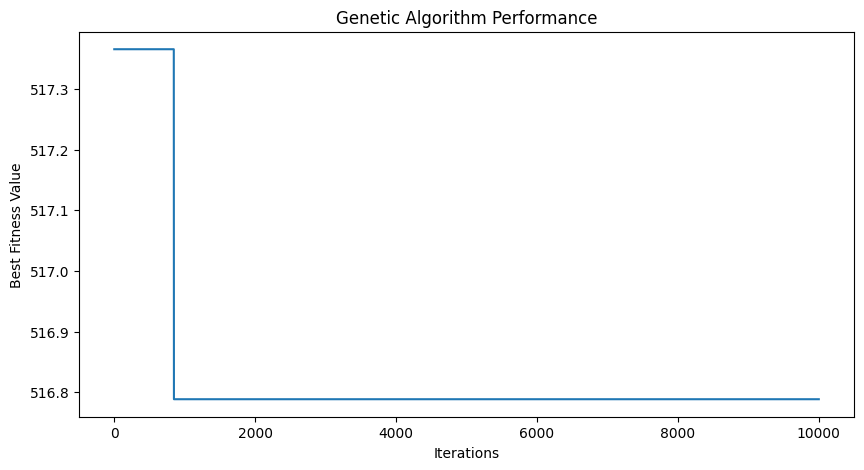

In [13]:
import matplotlib.pyplot as plt

# Lists to store data for visualization
iterations = []
best_fitness_values = []

# Main loop
for i in range(10000):
    if i % 100 == 0:
        print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))

    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)

    # Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set, fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

    # Append iteration number and best fitness value for visualization
    iterations.append(i)
    best_fitness_values.append(best_solution[1])

# Plot the best fitness value over iterations
plt.figure(figsize=(10, 5))
plt.plot(iterations, best_fitness_values)
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')
plt.title('Genetic Algorithm Performance')
plt.show()
